In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()
df = pd.read_csv("hotel_booking.csv") 
df.head()

Saving hotel_booking.csv to hotel_booking.csv


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df_removed = df.drop(columns=['distribution_channel', 'lead_time', 'required_car_parking_spaces'])

In [ ]:
len(df_removed)

119390

In [ ]:
df_removed.isna().sum() * 100/ len(df_removed)


hotel                              0.000000
is_canceled                        0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.686238
company                         

In [ ]:
df_removed = df_removed.drop(columns=['agent', 'company'])


In [ ]:
values = {"children": 0}
df_processed =df_removed.fillna(value=values)


In [ ]:
df_processed = df_processed.dropna(how='any',axis=0)
df_processed.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df_processed.isna().sum() * 100/ len(df_processed)

hotel                             0.0
is_canceled                       0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
total_of_special_requests         0.0
reservation_status                0.0
reservation_

In [ ]:
df_processed.shape[0]

118902

In [ ]:
df_processed.shape[1]

31

In [ ]:
df_processed.describe()


,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.571706
std,0.483174,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.792678
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000
50%,0.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000
75%,1.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,1.000000
max,1.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,5.000000


Removed the outliers where adr was above 400.

In [ ]:
np.percentile(df_processed.adr, [95,99])


df_processed = df_processed.loc[df_processed['adr'] < 400]
df_processed = df_processed.loc[df_processed.reserved_room_type != 'P']
df_processed['adr'].describe()
df_processed.groupby('reserved_room_type').count()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
reserved_room_type,,,,,,,,,,,,,,,,,,,,,
A,85597,85597,85597,85597,85597,85597,85597,85597,85597,85597,...,85597,85597,85597,85597,85597,85597,85597,85597,85597,85597
B,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,...,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118
C,931,931,931,931,931,931,931,931,931,931,...,931,931,931,931,931,931,931,931,931,931
D,19173,19173,19173,19173,19173,19173,19173,19173,19173,19173,...,19173,19173,19173,19173,19173,19173,19173,19173,19173,19173
E,6496,6496,6496,6496,6496,6496,6496,6496,6496,6496,...,6496,6496,6496,6496,6496,6496,6496,6496,6496,6496
F,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,...,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890
G,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,...,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082
H,599,599,599,599,599,599,599,599,599,599,...,599,599,599,599,599,599,599,599,599,599
L,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


Find the top 10 countries for the origin of the guests?

In [ ]:
df_processed['country'].value_counts()[:10]

PRT    48582
GBR    12129
FRA    10415
ESP     8567
DEU     7287
ITA     3765
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Who paid the most adr and their name is?

In [ ]:
max_adr = df_processed['adr'].idxmax()
name = df_processed.iloc[max_adr]['name']
pay = df_processed.iloc[max_adr]['adr']
print(f'{name} paid {pay}')

Alexandra Ellison paid 167.91


What is the avarage of nights stayed by the visitors


In [ ]:
df_processed['all_night']= df_processed.apply(lambda x: x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)
m = df_processed['all_night'].mean()
np.round(m,2)


3.43

Find the percentage of people who had one or more ‫‪special‬‬ ‫‪request‬‬?

In [ ]:

df_percent= round((len(df_processed[df_processed['total_of_special_requests'] >= 1][['name','email']])/len(df_processed))*100,2)
print(df_processed[df_processed['total_of_special_requests'] >= 1][['name','email']])
print(f'percentage of people: {df_percent} %')

                    name                     email
4            Linda Hines        LHines@verizon.com
5       Jasmine Fletcher   JFletcher43@xfinity.com
7          William Velez    Velez_William@mail.com
8          Steven Murphy   Steven.Murphy54@aol.com
12          Casey Thomas     Casey_T78@outlook.com
...                  ...                       ...
119380       Wanda Jones        Wanda_J@yandex.com
119384     James Mccarty           James_M@att.com
119386    Wesley Aguilar      WAguilar@xfinity.com
119387      Mary Morales  Mary_Morales@hotmail.com
119389    Ariana Michael      Ariana_M@xfinity.com

[48908 rows x 2 columns]
percentage of people: 41.14 %


Find the people with most children and baby that reserved hotel?

In [ ]:
df_processed['baby_children'] = df_processed.apply(lambda x: x['children'] + x['babies'], axis=1)
df_processed.sort_values( by= ['baby_children'], ascending= False)[['name','baby_children']][:10]

,name,baby_children
328,Jamie Ramirez,10.0
46619,Nicholas Parker,10.0
78656,Marc Robinson,9.0
118557,Alexander Rose,3.0
115799,Bryan Pierce,3.0
24409,Lindsay Rodriguez,3.0
41977,Dr. Richard Costa,3.0
6991,Jordan Li,3.0
105645,Cheryl Hall,3.0
39265,Jesus Norris,3.0


Top 10 countries of origin of Hotel visitors

Text(0, 0.5, 'Reservation Count')

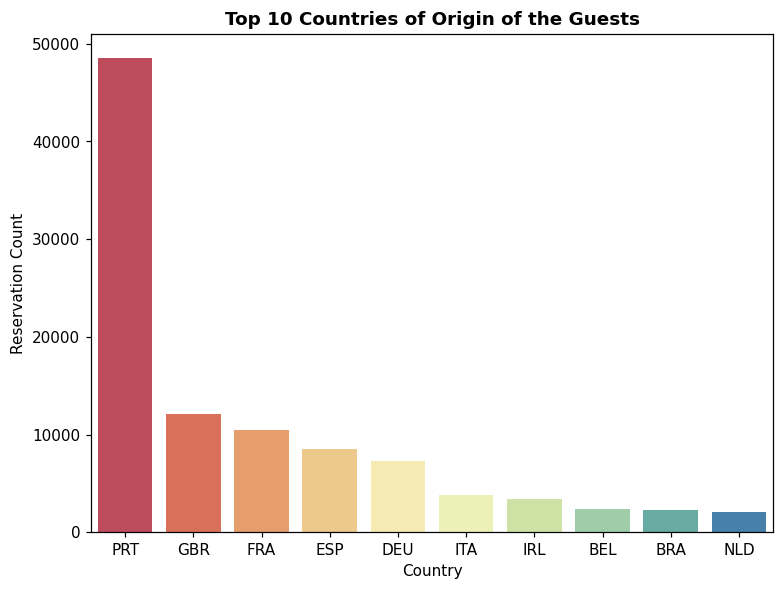

In [ ]:
plt.figure(figsize=(8,6), dpi=110)

sns.countplot(data=df_processed, x='country',order=pd.value_counts(df_processed['country']).iloc[:10].index,
              palette='Spectral')

plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

portugal is the highest

Resort hotel and city hotel distribution in pie chart

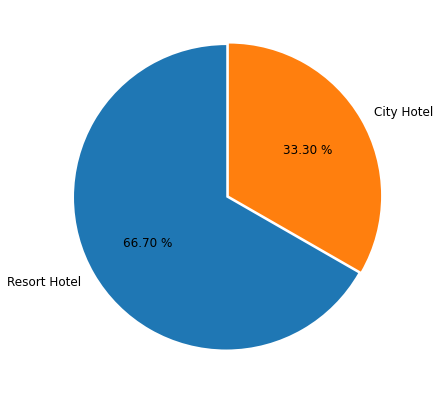

In [ ]:
count_list = df_processed['hotel'].value_counts()
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = ['Resort Hotel', 'City Hotel'], autopct = "%.2f %%", startangle = 90, explode = (0.01, 0.01), textprops = {'fontsize': 12})
plt.show()

What we understand from the chart: City Hotel has twice as more customers than Resort Hotel

Distributing the data for effect of deposit type on cancellations

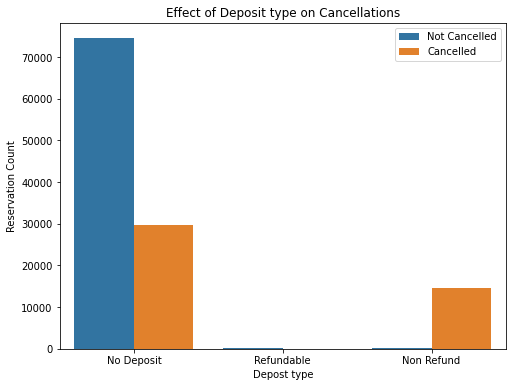

In [ ]:
df_grouped = df_processed.groupby('deposit_type')['is_canceled'].value_counts()

plt.figure(figsize=(8,6))
sns.countplot(data = df_processed, x= 'deposit_type', hue = 'is_canceled')

plt.title ('Effect of Deposit type on Cancellations')
plt.xlabel("Depost type")
plt.ylabel('Reservation Count')
plt.legend(['Not Cancelled', 'Cancelled'])



Distribution of average daily rate across the months and hotel type

In [ ]:
fig = px.treemap(df_processed, path=['arrival_date_month', 'hotel'],
                 values='adr',
                 color='adr')
 
fig.show()

Reserved room type vs rate and all the years

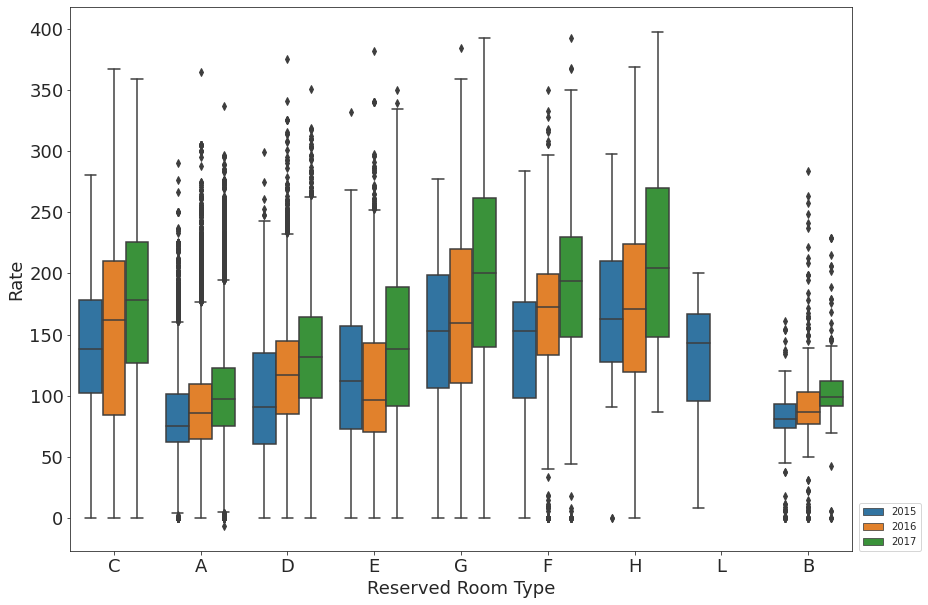

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(14,10))
sns.boxplot(data = df_processed[df_processed['adr']<700], x = 'reserved_room_type', y = 'adr', hue ='arrival_date_year', width = 0.8)
plt.xlabel("Reserved Room Type", fontsize = 18)
plt.xticks(fontsize=18)
plt.ylabel("Rate", fontsize = 18)
plt.yticks(fontsize=18)
plt.legend(loc=(1.01, 0))

Heat map to show the co-relation for different numerical columns

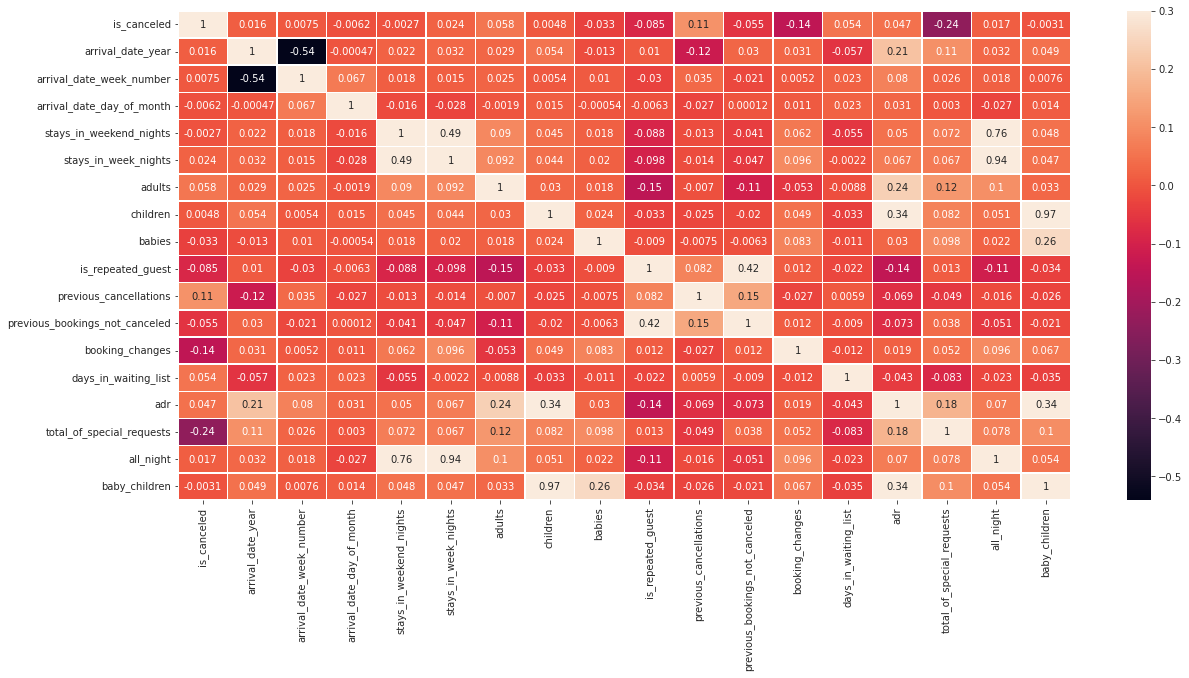

In [ ]:
plt.figure(figsize=(20,9))
sns.heatmap(df_processed.corr(),  vmax=.3,linewidths=0.5,annot=True)
plt.show()

In [ ]:
df_processed = df_processed.drop(columns =['all_night', 'baby_children'])

In [ ]:
# creating numerical and categorical dataframes

categorical_cols = [col for col in df_processed.columns if df_processed[col].dtype == 'O']
categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [ ]:
categorical_df = df_processed[categorical_cols]
categorical_df.head()

,hotel,arrival_date_month,meal,country,market_segment,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,July,BB,PRT,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,July,BB,PRT,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,July,BB,GBR,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,July,BB,GBR,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,July,BB,GBR,Online TA,A,A,No Deposit,Transient,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
categorical_df.loc[:,'reservation_status_date'] = pd.to_datetime(categorical_df['reservation_status_date'])

categorical_df.loc[:,'year'] = categorical_df['reservation_status_date'].dt.year
categorical_df.loc[:,'month'] = categorical_df['reservation_status_date'].dt.month
categorical_df.loc[:,'day'] = categorical_df['reservation_status_date'].dt.day

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
categorical_df = categorical_df.drop(columns=['reservation_status_date','reservation_status','arrival_date_month',	'name',	'email',	'phone-number', 'credit_card'])

In [ ]:
# encoding categorical variables

for j in categorical_df.columns:
    
    ord_enc = OrdinalEncoder()
    
    # transform the data column
    categorical_df[j] = ord_enc.fit_transform(categorical_df[[j]])

In [ ]:
categorical_df.head()

,hotel,meal,country,market_segment,reserved_room_type,assigned_room_type,deposit_type,customer_type,year,month,day
0,1.0,0.0,135.0,3.0,2.0,2.0,0.0,2.0,1.0,6.0,0.0
1,1.0,0.0,135.0,3.0,2.0,2.0,0.0,2.0,1.0,6.0,0.0
2,1.0,0.0,59.0,3.0,0.0,2.0,0.0,2.0,1.0,6.0,1.0
3,1.0,0.0,59.0,2.0,0.0,0.0,0.0,2.0,1.0,6.0,1.0
4,1.0,0.0,59.0,6.0,0.0,0.0,0.0,2.0,1.0,6.0,2.0


In [ ]:
numerical_df = df_processed.drop(columns = categorical_cols, axis = 1)
numerical_df.drop('is_canceled', axis = 1, inplace = True)
numerical_df

,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_of_special_requests
0,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0
1,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0
2,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0
3,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0
4,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0
119386,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,2
119387,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,4
119388,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0


In [ ]:
numerical_df.var()

arrival_date_year                    0.500515
arrival_date_week_number           184.688400
arrival_date_day_of_month           77.094194
stays_in_weekend_nights              0.992376
stays_in_week_nights                 3.610151
adults                               0.334702
children                             0.159249
babies                               0.009483
is_repeated_guest                    0.030980
previous_cancellations               0.715530
previous_bookings_not_canceled       2.204355
booking_changes                      0.426107
days_in_waiting_list               310.848257
adr                               2305.466608
total_of_special_requests            0.628255
dtype: float64

In [ ]:
numerical_df = numerical_df.drop(columns={'babies','is_repeated_guest','days_in_waiting_list'})

In [ ]:

# apply standardization on numerical features
for i in numerical_df.columns:
    
    # fit on data columns
    scale = StandardScaler()
    
    # transform the data columns
    numerical_df[i] = scale.fit_transform(numerical_df[[i]])


In [ ]:
numerical_df

,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,total_of_special_requests
0,-1.636230,-0.012247,-1.685681,-0.932442,-1.316883,0.244712,-0.260998,-0.103024,-0.088659,4.257038,-2.123025,-0.721271
1,-1.636230,-0.012247,-1.685681,-0.932442,-1.316883,0.244712,-0.260998,-0.103024,-0.088659,5.788980,-2.123025,-0.721271
2,-1.636230,-0.012247,-1.685681,-0.932442,-0.790576,-1.483801,-0.260998,-0.103024,-0.088659,-0.338790,-0.561015,-0.721271
3,-1.636230,-0.012247,-1.685681,-0.932442,-0.790576,-1.483801,-0.260998,-0.103024,-0.088659,-0.338790,-0.561015,-0.721271
4,-1.636230,-0.012247,-1.685681,-0.932442,-0.264269,0.244712,-0.260998,-0.103024,-0.088659,-0.338790,-0.081999,0.540364
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1.190754,0.576423,1.617171,1.075234,1.314652,0.244712,-0.260998,-0.103024,-0.088659,-0.338790,-0.120737,-0.721271
119386,1.190754,0.576423,1.731062,1.075234,1.314652,1.973226,-0.260998,-0.103024,-0.088659,-0.338790,2.571959,1.802000
119387,1.190754,0.576423,1.731062,1.075234,1.314652,0.244712,-0.260998,-0.103024,-0.088659,-0.338790,1.161569,4.325270
119388,1.190754,0.576423,1.731062,1.075234,1.314652,0.244712,-0.260998,-0.103024,-0.088659,-0.338790,0.051293,-0.721271


In [ ]:
numerical_df.var()

arrival_date_year                 1.000008
arrival_date_week_number          1.000008
arrival_date_day_of_month         1.000008
stays_in_weekend_nights           1.000008
stays_in_week_nights              1.000008
adults                            1.000008
children                          1.000008
previous_cancellations            1.000008
previous_bookings_not_canceled    1.000008
booking_changes                   1.000008
adr                               1.000008
total_of_special_requests         1.000008
dtype: float64

Split the data into 75% training data and 25% test data

In [ ]:
X = pd.concat([categorical_df, numerical_df], axis = 1)
y = df_processed['is_canceled']

In [ ]:
X.shape, y.shape

((118892, 23), (118892,))

In [ ]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Model Building

In [ ]:
# KNN Model
# Logistic Regression
# Random Forest
# Decision Tree

In [ ]:
X_train.isnull().sum()

hotel                             0
meal                              0
country                           0
market_segment                    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
adr                               0
total_of_special_requests         0
dtype: int64

KNN Model

In [ ]:
# KNN Model

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8778723547421189
Confusion Matrix : 
[[17865   971]
 [ 2659  8228]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18836
           1       0.89      0.76      0.82     10887

    accuracy                           0.88     29723
   macro avg       0.88      0.85      0.86     29723
weighted avg       0.88      0.88      0.88     29723



Logistic Regression

In [ ]:
lr = LogisticRegression(solver='sag')
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8454059146115802
Confusion Matrix : 
[[17859   896]
 [ 3699  7269]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     18755
           1       0.89      0.66      0.76     10968

    accuracy                           0.85     29723
   macro avg       0.86      0.81      0.82     29723
weighted avg       0.85      0.85      0.84     29723



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9505769942468795
Confusion Matrix : 
[[18038   717]
 [  752 10216]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     18755
           1       0.93      0.93      0.93     10968

    accuracy                           0.95     29723
   macro avg       0.95      0.95      0.95     29723
weighted avg       0.95      0.95      0.95     29723



Random Forest

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9533694445379
Confusion Matrix : 
[[18578   177]
 [ 1209  9759]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     18755
           1       0.98      0.89      0.93     10968

    accuracy                           0.95     29723
   macro avg       0.96      0.94      0.95     29723
weighted avg       0.95      0.95      0.95     29723



Model Evaluation

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.953369
2,Decision Tree Classifier,0.950577
1,KNN,0.877469
0,Logistic Regression,0.845406


In [ ]:
px.bar(data_frame = models, y = 'Score', x = 'Model', color = 'Score',color_continuous_scale='haline', template = 'plotly_dark', title = 'Models Comparison' ).update_yaxes(categoryorder="total descending")

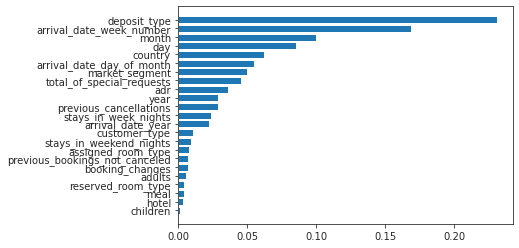

<Figure size 864x1080 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train,y_train)

f_i = list(zip(X,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.figure(figsize = (12, 15))
plt.show()